In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [ ]:
Set = load_digits()

In [ ]:
data_Set = Set['data']
target_Set = Set['target']

In [ ]:
estimator = tree.DecisionTreeClassifier()
cross_validation = cross_val_score(estimator, data_Set, target_Set, cv = 10)

In [ ]:
cross_validation.mean()

0.8252482929857232

In [ ]:
def write_answer(cross_val):
    with open("DecisionTreeClassifier.txt", "w") as fout:
        fout.write(str(cross_val.mean()))

write_answer(cross_validation)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = BaggingClassifier(estimator, n_estimators = 100)
cross_validation = cross_val_score(clf, data_Set, target_Set, cv = 10)

In [ ]:
cross_validation.mean()

0.9187212911235256

In [ ]:
write_answer(cross_validation)

In [ ]:
clf = BaggingClassifier(estimator, n_estimators = 100, max_features = int(np.sqrt(data_Set.shape[1])))

In [ ]:
cross_val_score(clf, data_Set, target_Set, cv = 10).mean()

0.9226567349472378

In [ ]:
write_answer(cross_val_score(clf, data_Set, target_Set, cv = 10))

In [ ]:
estimator = tree.DecisionTreeClassifier(max_features = int(np.sqrt(data_Set.shape[1])))
clf = BaggingClassifier(estimator, n_estimators = 100)

In [ ]:
cross_val_score(clf, data_Set, target_Set, cv = 10).mean()

0.9499099937926753

In [ ]:
write_answer(cross_val_score(clf, data_Set, target_Set, cv = 10))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def plot_trees(X, y):
    trees = [100, 200, 300, 400, 500, 1000]
    results = []
    for tree in trees:
        rf = RandomForestClassifier(n_estimators=tree)
        results.append(cross_val_score(rf, X, y, cv = 10).mean())
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()

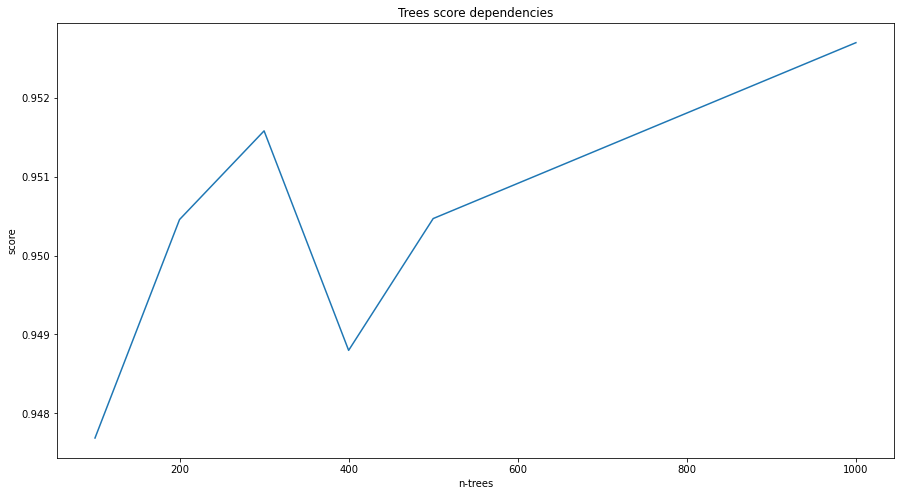

In [ ]:
plot_trees(data_Set, target_Set)

In [ ]:
def plot_features(X, y):
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    results = []
    for f in features:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_features=f)
        results.append(cross_val_score(rf, X, y).mean())
    plt.figure(figsize=(15, 8))
    plt.plot(features, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()

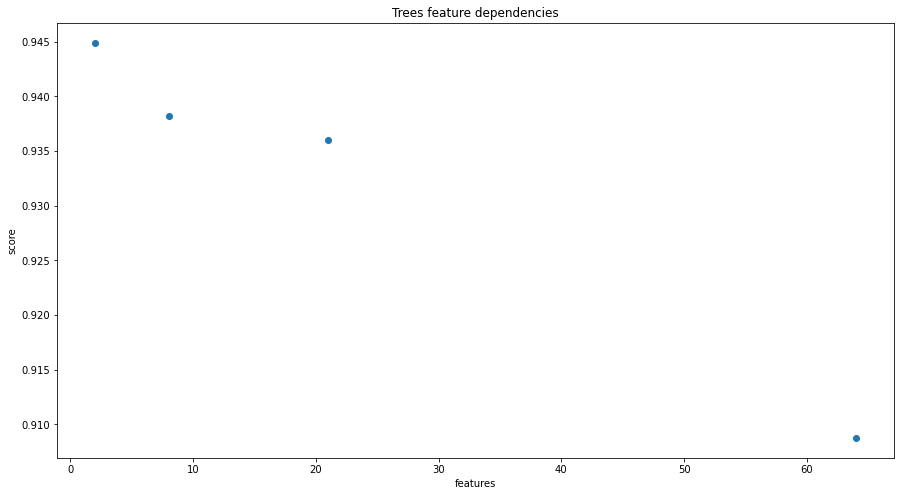

In [ ]:
plot_features(data_Set, target_Set)

In [ ]:
def plot_depth(X, y):
    depth = [2, 4, 6, 8]
    results = []
    for d in depth:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_depth = d)
        results.append(cross_val_score(rf, X, y).mean())
    plt.figure(figsize=(15, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("depth")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()

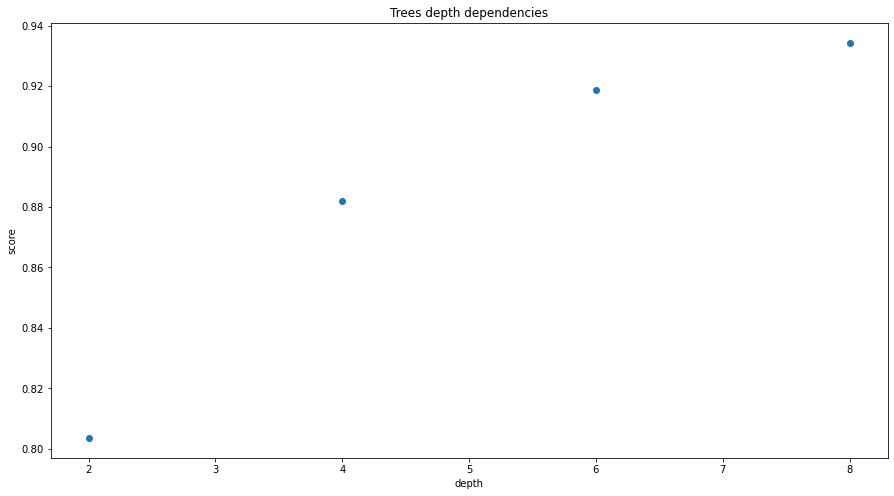

In [ ]:
plot_depth(data_Set, target_Set)